<a href="https://colab.research.google.com/github/vault5673/Support-Vector-Machines-SVM-/blob/main/Support_Vector_Machines_(SVM).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.decomposition import PCA

In [44]:
# Load and prepare the dataset
df = pd.read_csv("breast-cancer.csv")

In [45]:
# Drop any ID columns if present
df = df.loc[:, ~df.columns.str.contains('id', case=False)]

In [46]:
# Encode target column if necessary
if df['diagnosis'].dtype == 'object':
    df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

In [47]:
# Separate features and target
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

In [48]:
# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [49]:
# Split the data into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [50]:
# Train SVM with linear kernel
svm_linear = SVC(kernel='linear', C=1)
svm_linear.fit(X_train, y_train)
y_pred_linear = svm_linear.predict(X_test)

In [51]:
# Train SVM with RBF (non-linear) kernel
svm_rbf = SVC(kernel='rbf', C=1, gamma='scale')
svm_rbf.fit(X_train, y_train)
y_pred_rbf = svm_rbf.predict(X_test)

In [52]:
# Evaluate models
print("Linear Kernel Accuracy:", accuracy_score(y_test, y_pred_linear))
print("RBF Kernel Accuracy:", accuracy_score(y_test, y_pred_rbf))

Linear Kernel Accuracy: 0.9766081871345029
RBF Kernel Accuracy: 0.9707602339181286


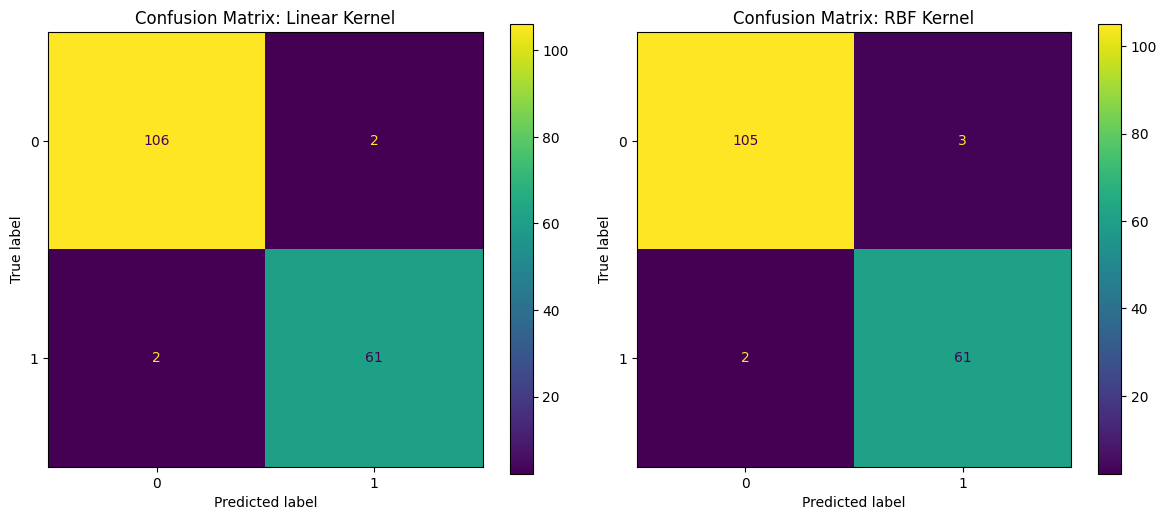

In [53]:
# Confusion matrices
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_linear, ax=ax[0])
ax[0].set_title("Confusion Matrix: Linear Kernel")

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_rbf, ax=ax[1])
ax[1].set_title("Confusion Matrix: RBF Kernel")
plt.tight_layout()
plt.show()

In [54]:
# Tune hyperparameters: C and gamma
svm_tuned = SVC(kernel='rbf', C=10, gamma=0.01)
svm_tuned.fit(X_train, y_train)
y_pred_tuned = svm_tuned.predict(X_test)
print("Tuned RBF Kernel Accuracy (C=10, gamma=0.01):", accuracy_score(y_test, y_pred_tuned))

Tuned RBF Kernel Accuracy (C=10, gamma=0.01): 0.9883040935672515


In [56]:
# Use cross-validation to evaluate performance
print("\nCross-Validation Scores (5-fold):")
for kernel in ['linear', 'rbf']:
    model = SVC(kernel=kernel, C=1)
    scores = cross_val_score(model, X_scaled, y, cv=5)
    print(f"{kernel.title()} Kernel: Mean={np.mean(scores):.3f}, Std={np.std(scores):.3f}")


Cross-Validation Scores (5-fold):
Linear Kernel: Mean=0.970, Std=0.010
Rbf Kernel: Mean=0.974, Std=0.015


In [57]:
# 8. Visualize decision boundaries using PCA (2D projection)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [58]:
svm_vis = SVC(kernel='rbf', C=1, gamma='scale')
svm_vis.fit(X_pca, y)

SVC(C=1)

In [59]:
# Create a mesh to plot decision boundary
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                     np.linspace(y_min, y_max, 500))

In [60]:
Z = svm_vis.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

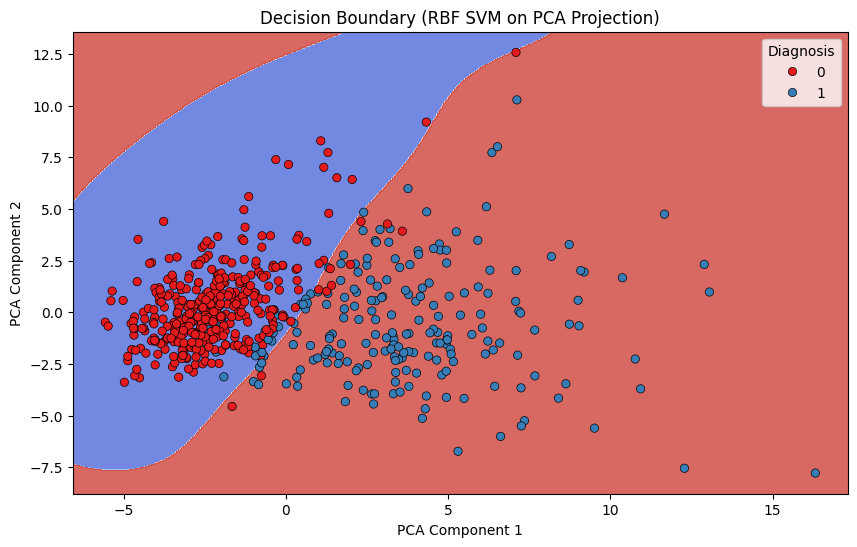

In [61]:
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette='Set1', edgecolor='k')
plt.title("Decision Boundary (RBF SVM on PCA Projection)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title='Diagnosis')
plt.show()